In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Downloads/spotify-2023.csv',encoding='unicode_escape')
pd.set_option('display.max_columns',None)

### Introduction of Data

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features

In [3]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


### Key Features:

 1. track_name: Name of the song
 2. artist(s)_name: Name of the artist(s) of the song
 3. artist_count: Number of artists contributing to the song
 4. released_year: Year when the song was released
 5. released_month: Month when the song was released
 6. released_day: Day of the month when the song was released
 7. in_spotify_playlists: Number of Spotify playlists the song is included in
 8. in_spotify_charts: Presence and rank of the song on Spotify charts
 9. streams: Total number of streams on Spotify
10. in_apple_playlists: Number of Apple Music playlists the song is included in
11. in_apple_charts: Presence and rank of the song on Apple Music charts
12. in_deezer_playlists: Number of Deezer playlists the song is included in
13. in_deezer_charts: Presence and rank of the song on Deezer charts
14. in_shazam_charts: Presence and rank of the song on Shazam charts
15. bpm: Beats per minute, a measure of song tempo
16. key: Key of the song
17. mode: Mode of the song (major or minor)
18. danceability_%: Percentage indicating how suitable the song is for dancing
19. valence_%: Positivity of the song's musical content
20. energy_%: Perceived energy level of the song
21. acousticness_%: Amount of acoustic sound in the song
22. instrumentalness_%: Amount of instrumental content in the song
23. liveness_%: Presence of live performance elements
24. speechiness_%: Amount of spoken words in the song

In [4]:
data.nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [7]:
data.drop(columns=['released_day','in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts'],inplace=True)

data.streams.astype(int) (OverflowError)

In [8]:
data['streams'].unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [9]:
data[data['streams']=='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,2877,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,54,110,A,Major,53,75,69,7,0,17,3


In [10]:
data.drop(574,inplace=True)

In [11]:
data['streams'] = data['streams'].astype('int64')

data['in_deezer_playlists'].astype(int) (ValueError)

In [12]:
data['in_deezer_playlists'].unique()

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66', '54',
       '21', '745', '182', '863', '161', '78', '95', '23', '10', '42',
       '582', '32', '318', '41', '15', '143', '50', '13', '245', '165',
       '184', '34', '24', '410', '151', '6', '843', '537', '247', '65',
       '138', '458', '2,445', '74', '57', '213', '109', '3,394', '3,421',
       '39', '142', '73', '102', '4', '89', '4,053', '169', '31', '8',
       '707', '1,056', '164', '4,095', '68', '331', '80', '18', '1,003',
       '71', '25', '5', '798', '110', '1,800', '141', '2,703', '35', '29',
       '0', '69', '63', '1,632', '163', '19', '59', '2,394', '1,034',
       '327', '2,163', '695', '2,655', '476', '145', '47', '61', '246',
       '38', '52', '6,551', '1,212', '1,078', '7', '282', '254', '588',
       '1', '2,094', '2,969', '26', '3,889', '99', '5,239', '44', '3',
       '974', '356', '12', '453', '3,631', '113', '112', '435', '929',
       '939', '4,607', '806', '885', '28', '2,733', '3,425', '

In [13]:
data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',','').astype('int64') #comma-sseparated values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   in_spotify_playlists  952 non-null    int64 
 6   streams               952 non-null    int64 
 7   in_apple_playlists    952 non-null    int64 
 8   in_deezer_playlists   952 non-null    int64 
 9   bpm                   952 non-null    int64 
 10  key                   857 non-null    object
 11  mode                  952 non-null    object
 12  danceability_%        952 non-null    int64 
 13  valence_%             952 non-null    int64 
 14  energy_%              952 non-null    int64 
 15  acousticness_%        952 non-null    in

In [15]:
data.nunique()

track_name              942
artist(s)_name          644
artist_count              8
released_year            50
released_month           12
in_spotify_playlists    878
streams                 948
in_apple_playlists      234
in_deezer_playlists     348
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [16]:
data.isnull().mean()*100

track_name              0.000000
artist(s)_name          0.000000
artist_count            0.000000
released_year           0.000000
released_month          0.000000
in_spotify_playlists    0.000000
streams                 0.000000
in_apple_playlists      0.000000
in_deezer_playlists     0.000000
bpm                     0.000000
key                     9.978992
mode                    0.000000
danceability_%          0.000000
valence_%               0.000000
energy_%                0.000000
acousticness_%          0.000000
instrumentalness_%      0.000000
liveness_%              0.000000
speechiness_%           0.000000
dtype: float64

In [17]:
data['key'] = data['key'].fillna('No Record')

In [18]:
data.duplicated().sum()

0

In [19]:
data.duplicated(subset='track_name').sum()

10

In [20]:
data[data['track_name'].duplicated(keep=False)]

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12211,1316855716,300,745,118,No Record,Major,71,65,68,6,0,3,7
13,Daylight,David Kushner,1,2023,4,3528,387570742,80,182,130,D,Minor,51,32,43,83,0,9,3
47,Die For You,The Weeknd,1,2016,11,2483,1647990401,68,24,134,C#,Minor,59,51,52,9,0,15,7
178,SNAP,Rosa Linn,1,2022,3,3202,726307468,148,226,170,No Record,Major,56,53,64,11,0,45,6
331,Numb,Linkin Park,1,2003,3,20111,1361425037,39,7341,110,A,Major,50,24,86,0,0,64,4
335,Miss You,"Robin Schulz, Oliver Tree",2,2022,8,5730,497225336,108,197,145,F#,Minor,59,20,74,1,0,15,5
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,629,303216294,32,9,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,2332,723894473,0,25,109,A#,Minor,84,72,74,10,0,34,7
417,Die For You,Joji,1,2022,11,1703,246390068,38,36,148,G#,Major,47,15,52,38,13,29,5
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,6512,446390129,88,277,134,C#,Major,45,72,24,91,0,18,4


SNAP,SPIT IN MY FACE!,About Damn Time

In [21]:
data.nunique()

track_name              942
artist(s)_name          644
artist_count              8
released_year            50
released_month           12
in_spotify_playlists    878
streams                 948
in_apple_playlists      234
in_deezer_playlists     348
bpm                     124
key                      12
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,952.0,1.556723e+00,8.933314e-01,1.0,1.000000e+00,1.0,2.000000e+00,8.000000e+00
released_year,952.0,2.018289e+03,1.101140e+01,1930.0,2.020000e+03,2022.0,2.022000e+03,2.023000e+03
released_month,952.0,6.038866e+00,3.564571e+00,1.0,3.000000e+00,6.0,9.000000e+00,1.200000e+01
in_spotify_playlists,952.0,5.202565e+03,7.901401e+03,31.0,8.745000e+02,2216.5,5.573750e+03,5.289800e+04
streams,952.0,5.141374e+08,5.668569e+08,2762.0,1.416362e+08,290530915.0,6.738690e+08,3.703895e+09
in_apple_playlists,952.0,6.786660e+01,8.647059e+01,0.0,1.300000e+01,34.0,8.800000e+01,6.720000e+02
in_deezer_playlists,952.0,3.855357e+02,1.131079e+03,0.0,1.300000e+01,44.0,1.642500e+02,1.236700e+04
bpm,952.0,1.225536e+02,2.806960e+01,65.0,9.975000e+01,121.0,1.402500e+02,2.060000e+02
danceability_%,952.0,6.698424e+01,1.463128e+01,23.0,5.700000e+01,69.0,7.800000e+01,9.600000e+01
valence_%,952.0,5.140651e+01,2.348053e+01,4.0,3.200000e+01,51.0,7.000000e+01,9.700000e+01


### No.of song released in each year

In [23]:
Released_year = data.released_year.value_counts().reset_index()

In [24]:
Released_year.sort_values(by='index',ascending=False)

,index,released_year
1,2023,175
0,2022,402
2,2021,119
3,2020,37
4,2019,36
10,2018,10
5,2017,23
6,2016,18
9,2015,11
7,2014,13


In [25]:
MonthDict={ 1 : "January",
            2 : "February",
            3 : "March",
            4 : "April",
            5 : "May",
            6 : "June",
            7 : "July",
            8 : "August",
            9 : "September",
           10 : "October",
           11 : "November",
           12 : "December"
}

#data['released_month'] = data['released_month'].replace(MonthDict)

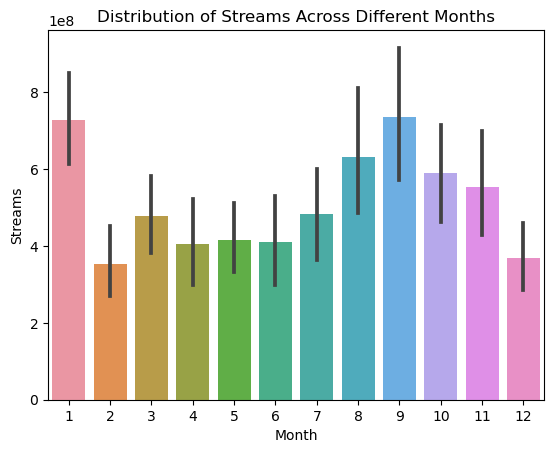

In [60]:
sns.barplot(x='released_month', y='streams', data=data)

# set the title and axis labels
plt.title('Distribution of Streams Across Different Months')
plt.xlabel('Month')
plt.ylabel('Streams')

# show the plot
plt.show()

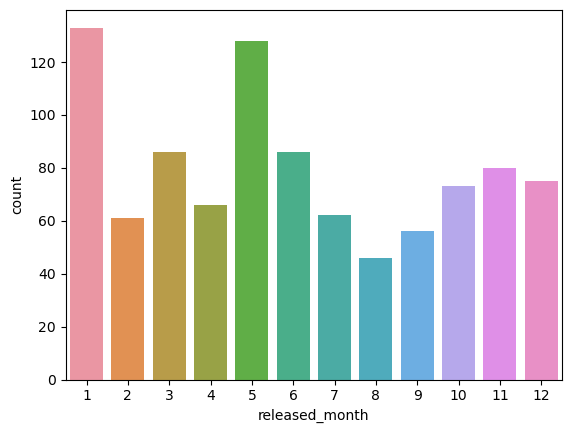

In [26]:
sns.countplot(data=data,x="released_month");

### Artist with most release

In [27]:
artist_nsong = data['artist(s)_name'].value_counts()

In [28]:
artist_nsong.head(1)

Taylor Swift    34
Name: artist(s)_name, dtype: int64

### Song with highest  stream hour

In [29]:
song_streamh = data[['track_name','artist(s)_name','released_year','streams']].\
               sort_values(by = 'streams',ascending=False)

In [30]:
song_streamh.head(1)

,track_name,artist(s)_name,released_year,streams
55,Blinding Lights,The Weeknd,2019,3703895074


3.56 billion hours

### Song with least stream hour

In [31]:
song_streamh.tail(1)

,track_name,artist(s)_name,released_year,streams
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2022,2762


In [32]:
data.streams.mean()

514137424.93907565

Five hundred and fourteen million

### Artist with most release (Top10)

In [33]:
artist_nsong10 = artist_nsong.head(10)

In [34]:
artist_nsong10

Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: artist(s)_name, dtype: int64

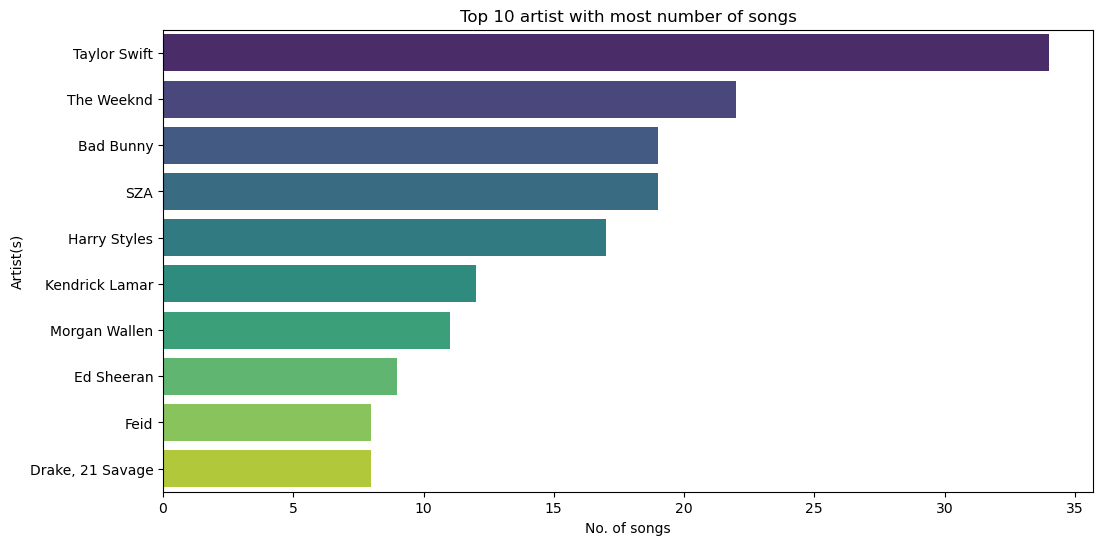

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=artist_nsong10.values,y=artist_nsong10.index,palette='viridis')
plt.xlabel('No. of songs')
plt.ylabel('Artist(s)')
plt.title('Top 10 artist with most number of songs')
plt.show;

### Song with total stream hour (Top 10)

In [36]:
song_streamh10 = song_streamh.head(10)

In [37]:
song_streamh10

,track_name,artist(s)_name,released_year,streams
55,Blinding Lights,The Weeknd,2019,3703895074
179,Shape of You,Ed Sheeran,2017,3562543890
86,Someone You Loved,Lewis Capaldi,2018,2887241814
620,Dance Monkey,Tones and I,2019,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2018,2808096550
162,One Dance,"Drake, WizKid, Kyla",2016,2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2021,2665343922
140,Believer,Imagine Dragons,2017,2594040133
725,Closer,"The Chainsmokers, Halsey",2016,2591224264
48,Starboy,"The Weeknd, Daft Punk",2016,2565529693


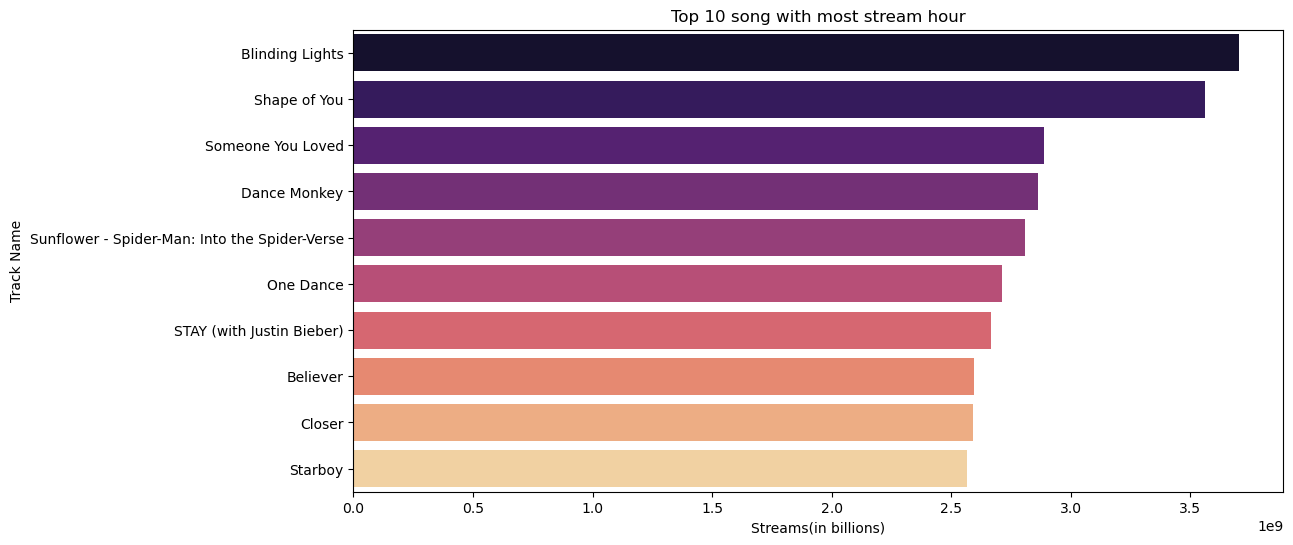

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=song_streamh10.streams,y=song_streamh10.track_name,palette='magma')
plt.xlabel('Streams(in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 song with most stream hour')
plt.show;

### Artists with total stream hours (Top 10)

In [39]:
artist_streamsht = data.groupby('artist(s)_name')['streams'].sum().reset_index()

In [40]:
artist_streamsht10 = artist_streamsht.sort_values(by='streams',ascending=False).head(10)

In [41]:
artist_streamsht10

,artist(s)_name,streams
571,The Weeknd,14185552870
557,Taylor Swift,14053658300
159,Ed Sheeran,13908947204
222,Harry Styles,11608645649
43,Bad Bunny,9997799607
430,Olivia Rodrigo,7442148916
170,Eminem,6183805596
75,Bruno Mars,5846920599
25,Arctic Monkeys,5569806731
228,Imagine Dragons,5272484650


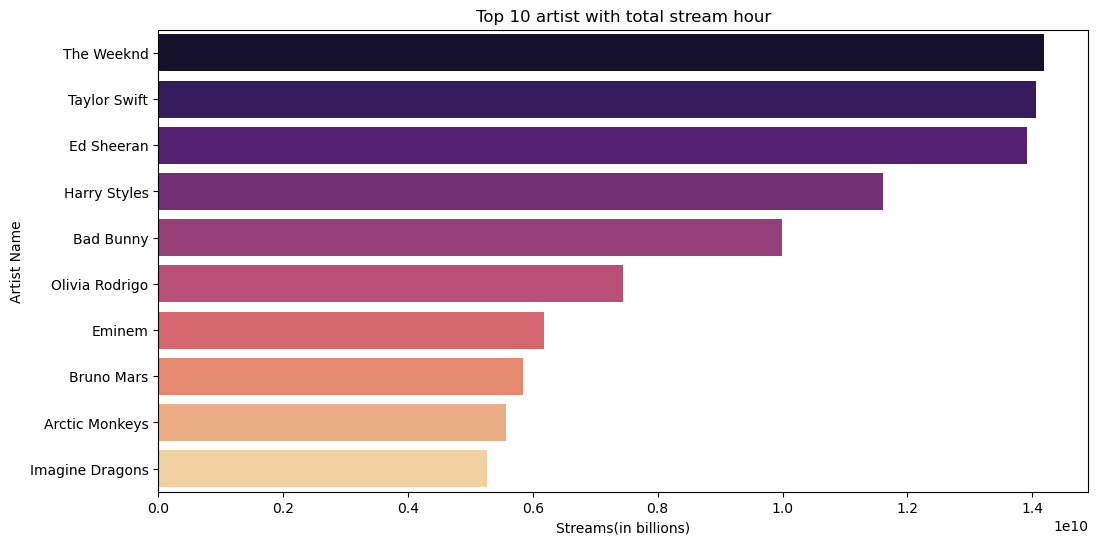

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x=artist_streamsht10.streams,y=artist_streamsht10['artist(s)_name'],palette='magma')
plt.xlabel('Streams(in billions)')
plt.ylabel('Artist Name')
plt.title('Top 10 artist with total stream hour')
plt.show;

le10 means 10^10

In [43]:
artist_streams_mean = data.groupby('artist(s)_name')['streams'].mean().sort_values(ascending=False)

In [44]:
artist_streams_mean.reset_index().head(10)

,artist(s)_name,streams
0,Tones and I,2.864792e+09
1,"Post Malone, Swae Lee",2.808097e+09
2,"Drake, WizKid, Kyla",2.713922e+09
3,"Justin Bieber, The Kid Laroi",2.665344e+09
4,"The Chainsmokers, Halsey",2.591224e+09
5,"The Weeknd, Daft Punk",2.565530e+09
6,Glass Animals,2.557976e+09
7,"Shawn Mendes, Camila Cabello",2.484813e+09
8,"Billie Eilish, Khalid",2.355720e+09
9,"The Chainsmokers, Coldplay",2.204081e+09


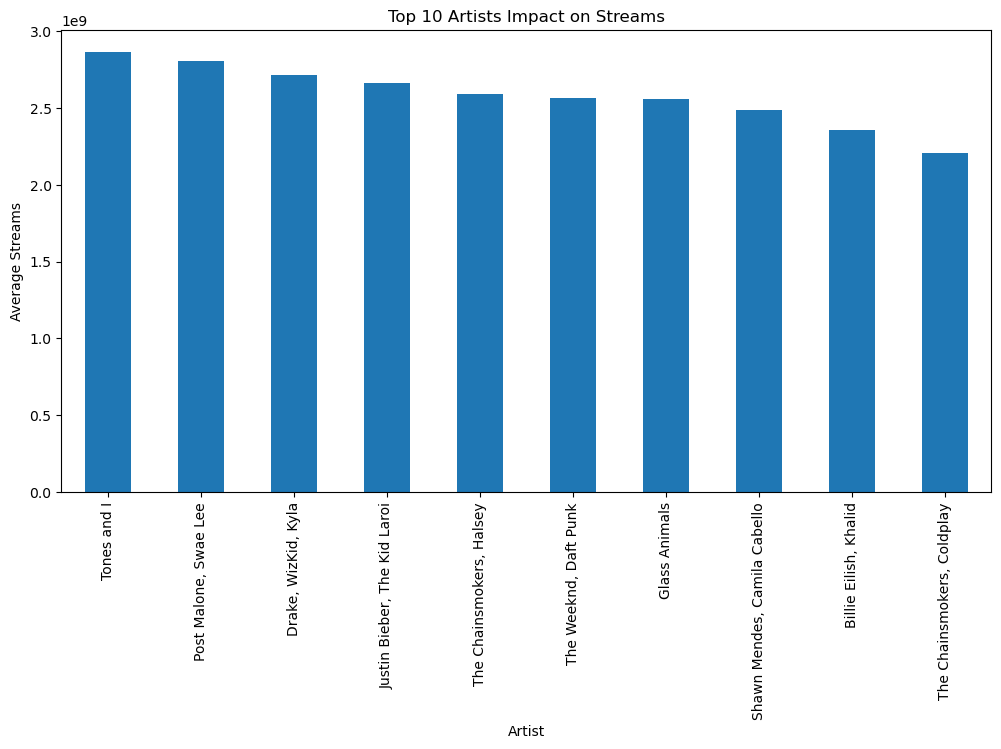

In [45]:
plt.figure(figsize=(12, 6))
artist_streams_mean.head(10).plot(kind='bar')
plt.title('Top 10 Artists Impact on Streams')
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.show();

### Distribution of BPM (Beats Per Minute)

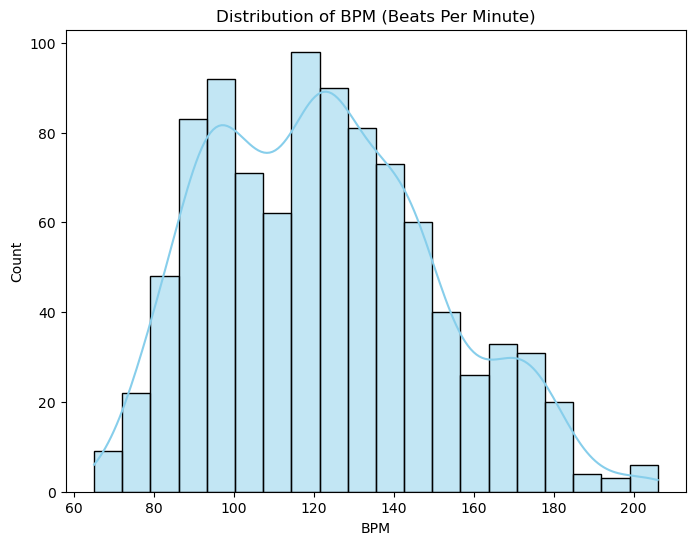

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(data['bpm'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of BPM (Beats Per Minute)')
plt.xlabel('BPM')
plt.ylabel('Count')
plt.show()

### Top songs by audio features

#### By danceability

In [47]:
top_danceable_songs = data.nlargest(10, 'danceability_%')[['track_name', 'artist(s)_name', 'danceability_%']]
top_danceable_songs

,track_name,artist(s)_name,danceability_%
595,Peru,"Ed Sheeran, Fireboy DML",96
224,Players,Coi Leray,95
250,The Real Slim Shady,Eminem,95
321,CAIRO,"Karol G, Ovy On The Drums",95
423,Super Freaky Girl,Nicki Minaj,95
702,Starlight,Dave,95
876,Ai Preto,"L7nnon, DJ Biel do Furduncinho, Bianca",95
268,Slut Me Out,NLE Choppa,94
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",93
266,Shorty Party,"Cartel De Santa, La Kelly",93


#### By energeticm

In [48]:
top_energetic_songs = data.nlargest(10, 'energy_%')[['track_name', 'artist(s)_name', 'energy_%']]
top_energetic_songs

,track_name,artist(s)_name,energy_%
42,I'm Good (Blue),"Bebe Rexha, David Guetta",97
319,Murder In My Mind,Kordhell,97
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",96
795,That That (prod. & feat. SUGA of BTS),"PSY, Suga",96
367,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",95
174,ýýýýýýýýýýýý,YOASOBI,94
352,Hype Boy,NewJeans,94
430,KICK BACK,Kenshi Yonezu,94
475,Merry Christmas,"Ed Sheeran, Elton John",94
552,Every Angel is Terrifying,The Weeknd,94


#### By positiveness based on valence

In [49]:
top_positive_songs = data.nlargest(10, 'valence_%')[['track_name', 'artist(s)_name', 'valence_%']]
top_positive_songs

,track_name,artist(s)_name,valence_%
359,Zona De Perigo,Leo Santana,97
418,Doja,Central Cee,97
754,There's Nothing Holdin' Me Back,Shawn Mendes,97
861,En El Radio Un Cochinero,Victor Cibrian,97
896,JGL,"Luis R Conriquez, La Adictiva",97
25,SABOR FRESA,Fuerza Regida,96
39,TQM,Fuerza Regida,96
53,(It Goes Like) Nanana - Edit,Peggy Gou,96
117,Rara Vez,"Taiu, Milo j",96
137,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",96


#### By acousticnessm

In [50]:
top_acoustic_songs = data.nlargest(10, 'acousticness_%')[['track_name', 'artist(s)_name', 'acousticness_%']]
top_acoustic_songs

,track_name,artist(s)_name,acousticness_%
167,The Night We Met,Lord Huron,97
940,Sweet Nothing,Taylor Swift,97
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,96
575,LA FAMA (with The Weeknd),"The Weeknd, ROSALï¿½",95
169,When I Was Your Man,Bruno Mars,94
858,Boyfriends,Harry Styles,94
128,lovely - Bonus Track,"Billie Eilish, Khalid",93
587,Miserable Man,David Kushner,93
623,All of Me,John Legend,92
652,The Joker And The Queen (feat. Taylor Swift),"Ed Sheeran, Taylor Swift",92


#### Top 10 instrumental songs

In [51]:
top_instrumental_songs = data.nlargest(10, 'instrumentalness_%')[['track_name', 'artist(s)_name', 'instrumentalness_%']]
top_instrumental_songs

,track_name,artist(s)_name,instrumentalness_%
684,Alien Blues,Vundabar,91
284,METAMORPHOSIS,INTERWORLD,90
917,Poland,Lil Yachty,83
691,Forever,Labrinth,72
4,WHERE SHE GOES,Bad Bunny,63
579,Freaks,Surf Curse,63
909,Static,Steve Lacy,63
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",61
88,Makeba,Jain,51
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",51


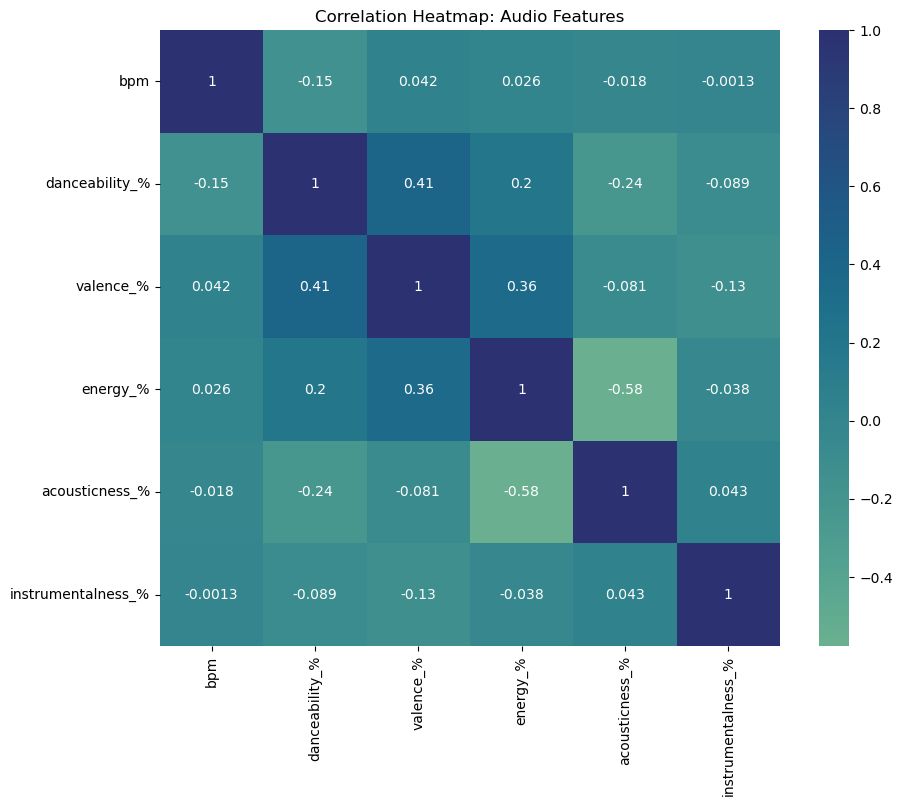

In [52]:
audio_features_columns = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']

correlation_matrix = data[audio_features_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap: Audio Features')
plt.show()

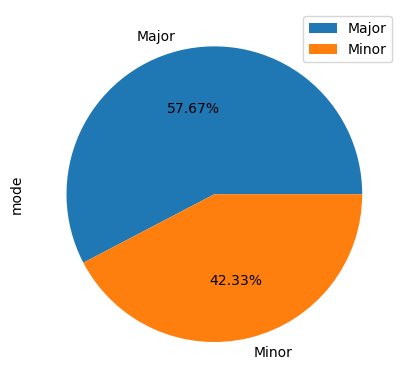

In [53]:
data['mode'].value_counts().plot.pie(autopct = '%1.2f%%', legend = True);

In [54]:
data.key.value_counts()

C#           120
G             96
No Record     95
G#            91
F             89
B             81
D             81
A             74
F#            73
E             62
A#            57
D#            33
Name: key, dtype: int64

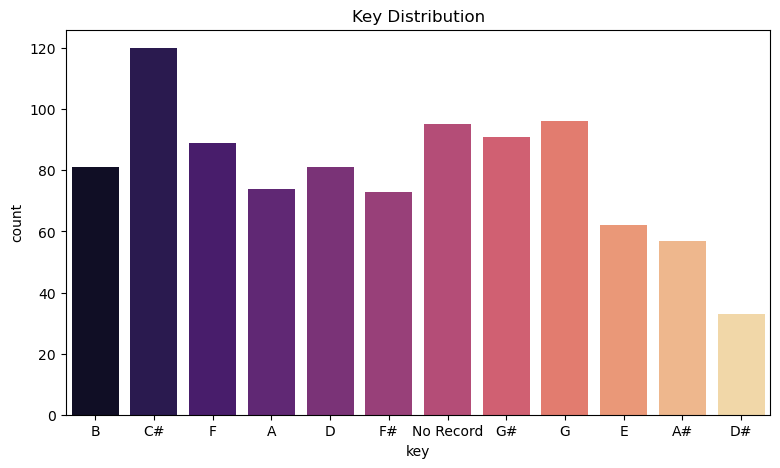

In [55]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='key', data=data, palette='magma')
plt.title('Key Distribution');

### Box plot of streams by key and mode

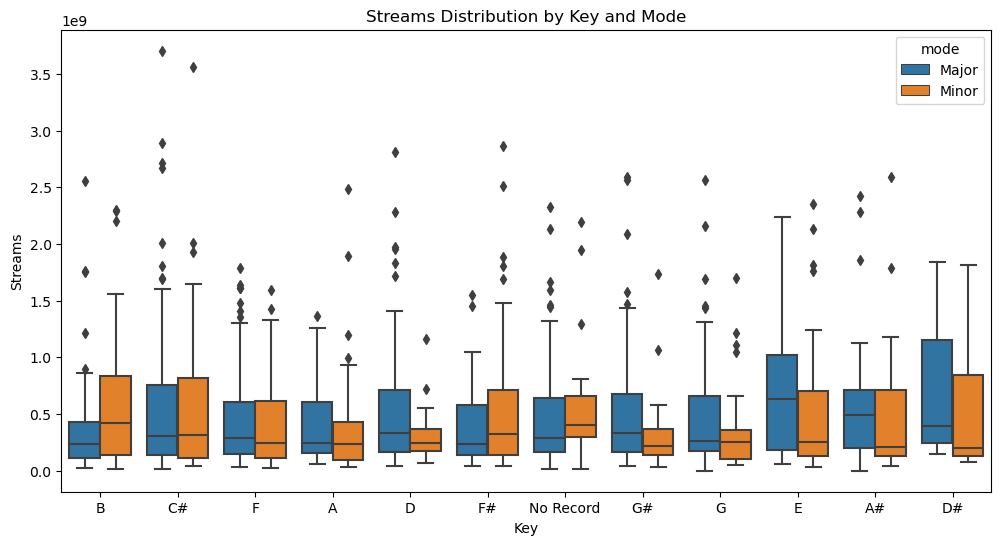

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='streams', hue='mode', data=data)
plt.title('Streams Distribution by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show();

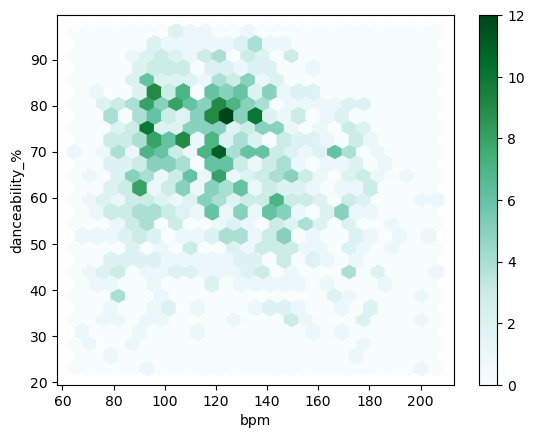

In [57]:
data.plot.hexbin('bpm','danceability_%',gridsize=25);

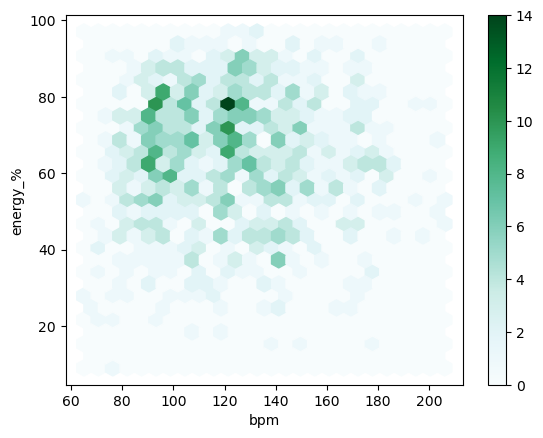

In [58]:
data.plot.hexbin('bpm','energy_%',gridsize=25);

### Visualization of variation in 'Streams' with audio features

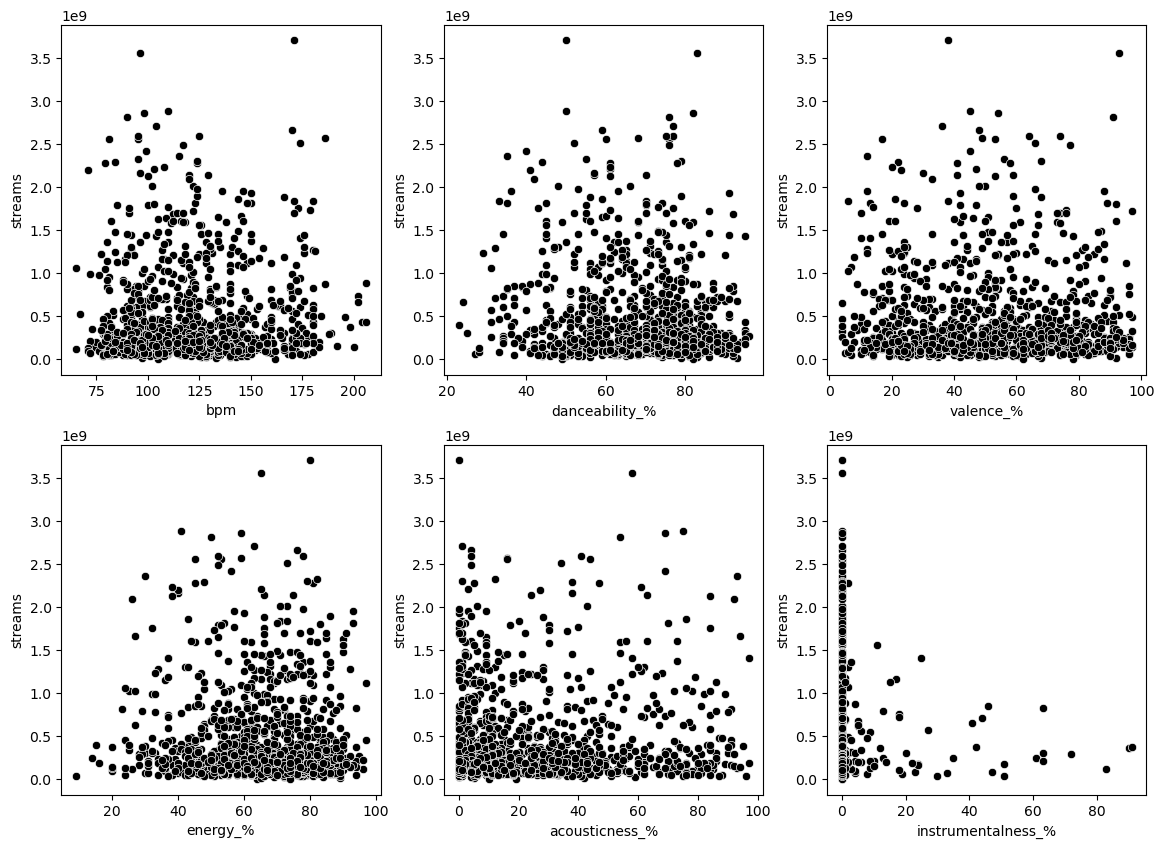

In [59]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(14,10))
i=0
for feature in audio_features_columns:
    n=i//3
    m=i%3
    sns.scatterplot(y='streams',x=feature,data=data,ax=ax[n,m],color='black')
    i+=1